3 & 4:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

5) Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

6) Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6729)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [3]:
gdp_df.tail(2)

,Country or Area,Year,Value,Value Footnotes
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [4]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [5]:
internet_df.tail(2)

,Country or Area,Year,Value,Value Footnotes
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


7)Look at the shape of each DataFrame - how many rows? How many columns?

gdp: 6729 rows, 4 columns
internet: 4495 rows, 4 columns

In [6]:
gdp_df.shape

(6729, 4)

In [7]:
internet_df.shape

(4495, 4)

8)Take a look at the datatypes for the columns in each DataFrame.

In [8]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [9]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

9)Take a look at the last 10 rows of each DataFrame in turn.

In [10]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [11]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


10)Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [12]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [13]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [14]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [15]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

11)Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

12)Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [16]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [17]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


13)Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [18]:
gdp_and_internet_use = gdp_df.merge(internet_df, how="outer", on=["Country", "Year"])

14)Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [19]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


15)Look at the last five rows to make sure the data is clean and as expected.

In [20]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


Adding a 2010 df to use later with additional data:

In [21]:
gdp_and_internet_use_2010 = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2010]) ]

16)Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [22]:
gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2004,2009,2014]) ]

In [23]:
gdp_and_internet_use.Year.value_counts()

2009    279
2014    278
2004    278
Name: Year, dtype: int64

In [24]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


In [25]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510
7693,Virgin Islands (U.S.),2004,NaN,27.377009


17)Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [26]:
gdp_internet_2004 = gdp_and_internet_use.query('Year == 2004')
gdp_internet_2004.shape

(278, 4)

In [27]:
gdp_internet_2009 = gdp_and_internet_use.query('Year == 2009')
gdp_internet_2009.shape

(279, 4)

In [28]:
gdp_internet_2014 = gdp_and_internet_use.query('Year == 2014')
gdp_internet_2014.shape

(278, 4)

18)Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

Iceland - 98.16

In [29]:
gdp_internet_2014[gdp_internet_2014.Internet_Users_Pct == (gdp_internet_2014.Internet_Users_Pct.max())]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16


19)Which country had the lowest percentage of internet users in 2014? What was the percentage?

Dem. People's Rep. of Korea (North Korea) - 0.0

In [30]:
gdp_internet_2014[gdp_internet_2014.Internet_Users_Pct == (gdp_internet_2014.Internet_Users_Pct.min())]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.0


20)Repeat for 2004 and 2009.

2004 - Max: Sweden, 83.89; Min: Dem. People's Rep. of Korea (North Korea), 0.0 - 
2009 - Max: Iceland, 93.0; Min: Dem. People's Rep. of Korea (North Korea), 0.0

In [31]:
gdp_internet_2004[gdp_internet_2004.Internet_Users_Pct == (gdp_internet_2004.Internet_Users_Pct.max())]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5852,Sweden,2004,40177.850408,83.89


In [32]:
gdp_internet_2004[gdp_internet_2004.Internet_Users_Pct == (gdp_internet_2004.Internet_Users_Pct.min())]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6949,Dem. People's Rep. of Korea,2004,NaN,0.0


In [33]:
gdp_internet_2009[gdp_internet_2009.Internet_Users_Pct == (gdp_internet_2009.Internet_Users_Pct.max())]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2586,Iceland,2009,41505.084834,93.0


In [34]:
gdp_internet_2009[gdp_internet_2009.Internet_Users_Pct == (gdp_internet_2009.Internet_Users_Pct.min())]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6944,Dem. People's Rep. of Korea,2009,NaN,0.0


21)Which country had the highest gdp per capita in 2014? What was the gdp per capita?

Macao SAR, China - 130439.106674

In [35]:
gdp_internet_2014[gdp_internet_2014.GDP_Per_Capita == (gdp_internet_2014.GDP_Per_Capita.max())]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN


22)Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

Central African Republic - 672.681648

In [36]:
gdp_internet_2014[gdp_internet_2014.GDP_Per_Capita == (gdp_internet_2014.GDP_Per_Capita.min())]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN


23)Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

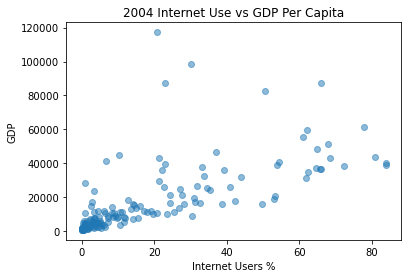

In [37]:
plt.scatter(gdp_internet_2004.Internet_Users_Pct, gdp_internet_2004.GDP_Per_Capita, alpha = 0.5) 
plt.xlabel('Internet Users %')
plt.ylabel('GDP')
plt.title('2004 Internet Use vs GDP Per Capita');

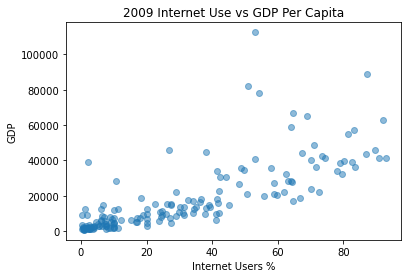

In [38]:
plt.scatter(gdp_internet_2009.Internet_Users_Pct, gdp_internet_2009.GDP_Per_Capita, alpha = 0.5)
plt.xlabel('Internet Users %')
plt.ylabel('GDP')
plt.title('2009 Internet Use vs GDP Per Capita');

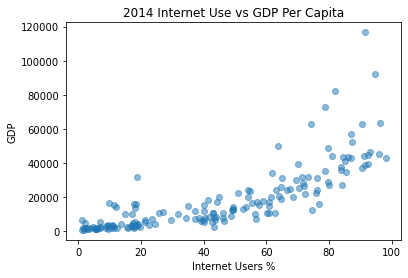

In [39]:
plt.scatter(gdp_internet_2014.Internet_Users_Pct, gdp_internet_2014.GDP_Per_Capita, alpha = 0.5)
plt.xlabel('Internet Users %')
plt.ylabel('GDP')
plt.title('2014 Internet Use vs GDP Per Capita');

24)Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

-GDP & internet usage become more connected as the years pass. Less outliers.

25)Look at the distribution of gdp per capita values for 2014. Is it unimodal?
-Yes

C:\Users\kkosf\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kkosf\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


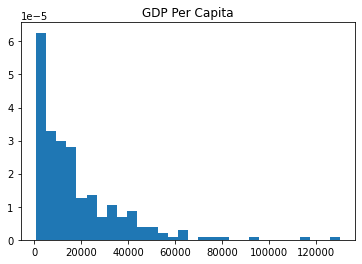

In [40]:
plt.hist(gdp_internet_2014.GDP_Per_Capita, bins = 30, density = True)
plt.title('GDP Per Capita');

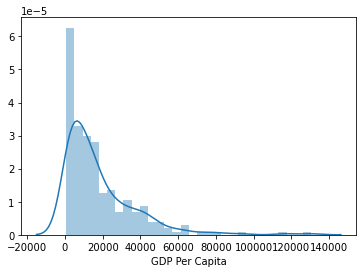

In [41]:
#different type of histogram:
sns.distplot(gdp_internet_2014.GDP_Per_Capita, bins = 30)
plt.xlabel('GDP Per Capita');

26)Look at the distribution of Internet Use for 2014. Is it unimodal?
-No

C:\Users\kkosf\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kkosf\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


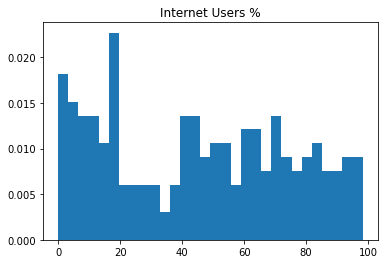

In [42]:
plt.hist(gdp_internet_2014.Internet_Users_Pct, bins = 30, density = True)
plt.title('Internet Users %');

27)What are the top 5 countries in terms of internet use in 2014?

In [43]:
gdp_internet_2014.nlargest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


28)Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [44]:
countries = ['Iceland' , 'Bermuda' , 'Norway' , 'Denmark' , 'Andorra']
gdp_and_internet_use.Country.isin(countries)
top_5_internet = gdp_and_internet_use[gdp_and_internet_use.Country.isin(countries)]
top_5_internet.shape

(15, 4)

In [45]:
#Clint's code:
#top_5_internet = gdp_and_internet_use.loc[(gdp_and_internet_use['Year'].isin(['2004', '2009', '2014']))&
#                                         (gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']))]
#top_5_internet.shape

#Mahesh's code:
#top_5_countries = gdp_and_internet_use_2014.sort_values(‘Internet_Users_Pct’, ascending = False).head()[‘Country’]

#top_5_internet = gdp_and_internet_use_sub[gdp_and_internet_use_sub[‘Country’].isin(top_5_countries)]

In [46]:
top_5_internet = top_5_internet.sort_values('Year',ascending=True).reset_index()
top_5_internet

,index,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,547,Bermuda,2004,55452.638880,60.990867
1,1414,Denmark,2004,43670.446201,80.930000
2,2591,Iceland,2004,38893.378798,83.880000
3,4540,Norway,2004,61612.275634,77.690000
4,6742,Andorra,2004,NaN,26.837954
5,542,Bermuda,2009,57151.919132,83.250000
6,1409,Denmark,2009,43382.615688,86.840000
7,2586,Iceland,2009,41505.084834,93.000000
8,4535,Norway,2009,62617.153609,92.080000
9,6737,Andorra,2009,NaN,78.530000


29)Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). 

-Which country had the greatest growth between 2004 and 2014? Andorra
-Is there a plotting issue with Bermuda? Yes, starts with 2009 instead of 2004
-Can you fix it? -See above to sort the dataframe

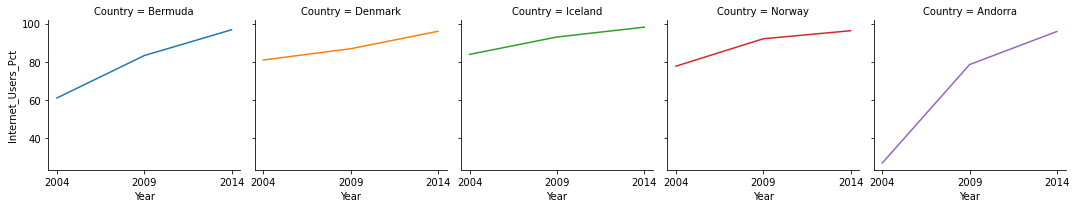

In [47]:
g = sns.FacetGrid(top_5_internet, col='Country', hue='Country')
g.map(plt.plot, "Year", "Internet_Users_Pct")
g.set(xticks = [2004, 2009, 2014]);

30)Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. 
-Which country has consistently had the least internet use? North Korea reports none

In [48]:
gdp_internet_2014.nsmallest(5, 'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.737732,1.14
794,Burundi,2014,768.469837,1.38
7521,Somalia,2014,NaN,1.63


In [49]:
countries = ["Dem. People's Rep. of Korea" , 'Eritrea' , 'Timor-Leste' , 'Burundi' , 'Somalia']
gdp_and_internet_use.Country.isin(countries)
bottom_5_internet = gdp_and_internet_use[gdp_and_internet_use.Country.isin(countries)]
bottom_5_internet.shape

(15, 4)

In [50]:
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.380000
799,Burundi,2009,721.063140,0.900000
804,Burundi,2004,708.833720,0.349060
1722,Eritrea,2009,1950.533339,0.540000
1727,Eritrea,2004,2317.349879,NaN
6044,Timor-Leste,2014,6466.737732,1.140000
6049,Timor-Leste,2009,9275.529371,0.185252
6054,Timor-Leste,2004,4898.575839,NaN
6940,Dem. People's Rep. of Korea,2014,NaN,0.000000
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000


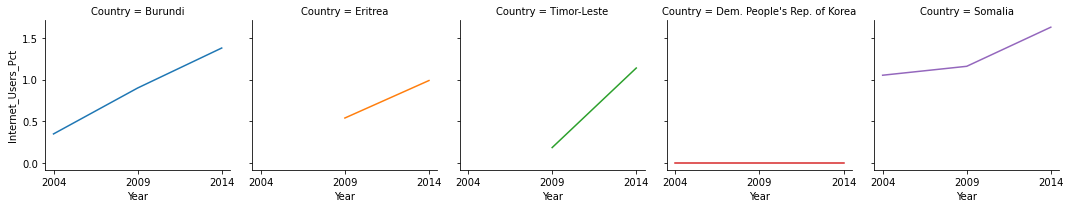

In [51]:
g = sns.FacetGrid(bottom_5_internet, col='Country', hue='Country')
g.map(plt.plot, "Year", "Internet_Users_Pct")
g.set(xticks = [2004, 2009, 2014]);

31)Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [52]:
gdp_internet_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


In [53]:
countries = ['Macao SAR, China' , 'Qatar' , 'Luxembourg' , 'Singapore' , 'Brunei']
gdp_and_internet_use.Country.isin(countries)

top_5_gdp = gdp_and_internet_use[gdp_and_internet_use.Country.isin(countries)]
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
707,Brunei,2014,76448.593329,NaN
712,Brunei,2009,79485.001581,NaN
717,Brunei,2004,83963.238066,NaN
3610,Luxembourg,2014,92349.186429,94.670000
3615,Luxembourg,2009,89098.734264,87.310000
3620,Luxembourg,2004,87209.819367,65.880000
3639,"Macao SAR, China",2014,130439.106674,NaN
3644,"Macao SAR, China",2009,79955.986107,NaN
3649,"Macao SAR, China",2004,60791.976853,NaN
5003,Qatar,2014,116693.507701,91.490000


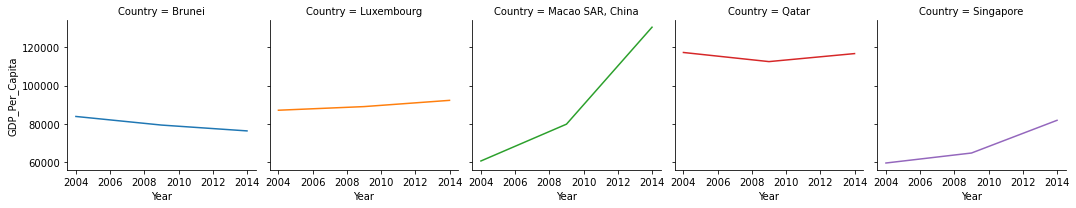

In [54]:
g = sns.FacetGrid(top_5_gdp, col='Country', hue='Country')
g.map(plt.plot, "Year", "GDP_Per_Capita");

32)Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [55]:
gdp_internet_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


In [56]:
countries = ['Central African Republic' , 'Burundi' , 'Dem. Rep. Congo' , 'Niger' , 'Malawi']
gdp_and_internet_use.Country.isin(countries)

bottom_5_gdp = gdp_and_internet_use[gdp_and_internet_use.Country.isin(countries)]
bottom_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.380000
799,Burundi,2009,721.063140,0.900000
804,Burundi,2004,708.833720,0.349060
1014,Central African Republic,2014,672.681648,NaN
1019,Central African Republic,2009,949.551325,NaN
1024,Central African Republic,2004,848.689032,NaN
1375,Dem. Rep. Congo,2014,784.872656,NaN
1380,Dem. Rep. Congo,2009,636.875743,NaN
1385,Dem. Rep. Congo,2004,577.483297,NaN
3697,Malawi,2014,1142.530804,5.830000


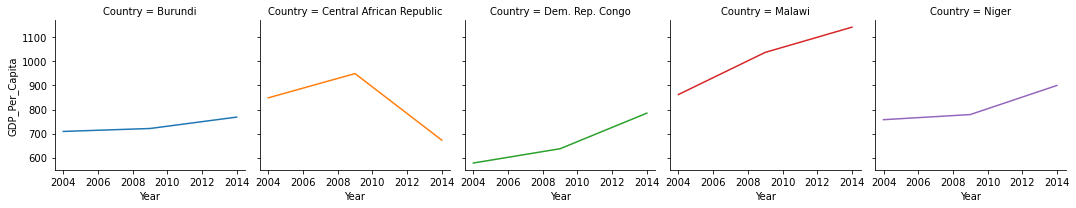

In [57]:
g = sns.FacetGrid(bottom_5_gdp, col='Country', hue="Country")
g.map(plt.plot, "Year", "GDP_Per_Capita");

33)Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?
-https://en.wikipedia.org/wiki/Macau

-https://en.wikipedia.org/wiki/Central_African_Republic :CAR is the scene of a civil war, ongoing since 2012. The Central African Republic Bush War began in 2004 and, despite a peace treaty in 2007 and another in 2011, civil war resumed in 2012

Bonus exercise:
Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [58]:
literacy_df = pd.read_csv('../data/literacy_rates.csv', nrows=547)
literacy_df = literacy_df.drop(columns = ['Value Footnotes'])
literacy_df = literacy_df.rename(columns = {'Country or Area' : 'Country', 'Year(s)':'Year', 'Value' : 'Literacy_Pct'})
literacy_df

,Country,Year,Literacy_Pct
0,Albania,2011,96.8
1,Albania,2008,95.9
2,Albania,2001,98.7
3,Algeria,2006,72.6
4,Algeria,2002,69.9
...,...,...,...
542,Zambia,1999,68.0
543,Zambia,1990,65.0
544,Zimbabwe,2011,83.6
545,Zimbabwe,2010,92.2


In [59]:
literacy_df.Year.value_counts()

2010    116
2011     76
2000     42
2007     34
2001     29
2009     29
2004     28
2008     27
2006     24
1991     22
2005     20
2002     19
1990     15
1994     12
2003     11
1999      9
1992      9
1996      8
1998      5
1995      5
1993      4
1997      2
2012      1
Name: Year, dtype: int64

In [60]:
literacy_2010 = literacy_df[literacy_df['Year'].isin(['2010']) ]
literacy_2010.shape

(116, 3)

In [61]:
gdp_int_lit_2010 = gdp_and_internet_use_2010.merge(literacy_2010, how="outer", on=["Country", "Year"])
gdp_int_lit_2010.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Literacy_Pct
0,Afghanistan,2010,1671.581238,4.0,NaN
1,Albania,2010,9927.638204,45.0,NaN
2,Algeria,2010,12919.491054,12.5,NaN
3,Angola,2010,6360.441938,10.0,70.1
4,Antigua and Barbuda,2010,20555.414205,47.0,99.0


In [62]:
gdp_int_lit_2010.nlargest(5, 'Literacy_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Literacy_Pct
64,Estonia,2010,22994.692512,74.10,99.8
122,Latvia,2010,18283.290152,68.42,99.8
254,Cuba,2010,NaN,15.90,99.8
77,Georgia,2010,7294.783234,26.90,99.7
110,Kazakhstan,2010,20096.559762,31.60,99.7


In [63]:
gdp_int_lit_2010.nsmallest(5, 'Literacy_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Literacy_Pct
85,Guinea,2010,1666.485283,1.00,25.3
139,Mali,2010,1875.185540,2.00,31.1
39,Chad,2010,1914.735848,1.70,34.5
84,Guinea,2010,1666.485283,1.00,41.0
195,Sierra Leone,2010,1208.048721,0.58,42.1


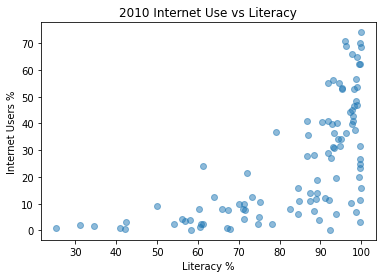

In [64]:
gdp_int_lit_2010.dropna()
plt.scatter(gdp_int_lit_2010.Literacy_Pct, gdp_int_lit_2010.Internet_Users_Pct, alpha = 0.5)
plt.xlabel('Literacy %')
plt.ylabel('Internet Users %')
plt.title('2010 Internet Use vs Literacy');

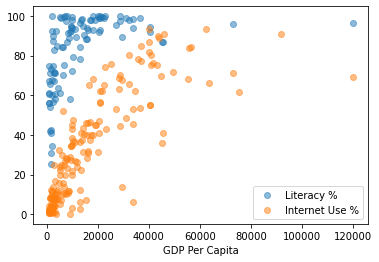

In [65]:
gdp_int_lit_2010.dropna()
plt.scatter(gdp_int_lit_2010.GDP_Per_Capita, gdp_int_lit_2010.Literacy_Pct, alpha = 0.5, label='Literacy %')
plt.scatter(gdp_int_lit_2010.GDP_Per_Capita, gdp_int_lit_2010.Internet_Users_Pct, alpha = 0.5, label='Internet Use %')
plt.xlabel('GDP Per Capita')
plt.legend();